# Vibrações com excitação harmônica - 2 Graus de Liberdade
 _Prof. Tito Dias Júnior_

Considerando o arranjo de massas, molas e amortecedores abaixo:

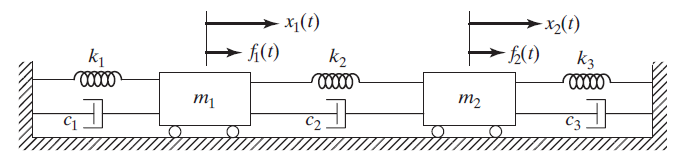

Obtemos o modelo a partir dos diagramas de corpo livre:

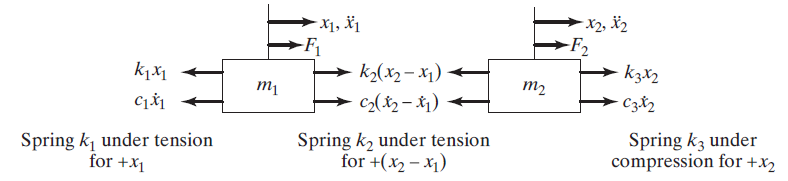

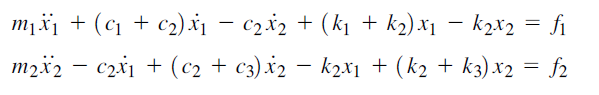
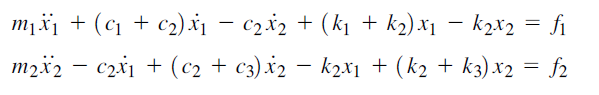

Para a solução numérica do problema devemos transformar o sistema de duas equações de 2ª Ordem em um sistema de 4 equações de 1ª Ordem.
Para isso, utilizamos duas variáveis auxiliares fazendo $y_1 = \dot{x}_1$ e  $y_2 = \dot{x}_2$, e obtemos o seguinte sistema de equações:

$\dot{x}_1 = y_1$

$\dot{y}_1 = [f_1 -(c_1+c_2)y_1 +c_2*y_2- (k_1+k_2) x_1 + k_2 x_2]/m_1 $

$\dot{x}_2 = y_2$

$\dot{y}_2 = [f_2 + c_2*y_1 - (c_2+c_3)y_2 + k_2 x_1 - (k_2+k_3) x_2 ]/m_2 $


## EXEMPLO: 
Encontre resposta de vibração para o sistema onde $k_1 = 30$, $k_2 = 5$, $k_3 = 0$, $m_1 = 10 $, $m_2 = 1$, e $c_1 = c_2 = c_3 = 0$ 
para as condições iniciais $x_1(0) = 1$, $y_1(0) = x_2(0) = y_2(0) = 0$.



Para o programa, vamos precisar do módulo  _scipy_ para a integração e o _pylab_ para plotar os resultados.

Inicialmente, vamos definir, como uma função, o sistema de equações que será chamado posteriormente:

In [ ]:
def sistema(w, t, p):
    import numpy as nps
    """
    Define o sistema de equações diferenciais para o sistema.

    Argumentos:
        w :  vetor das variáveis de estado
                  w = [x,y]
        t :  tempo
        p :  vetor de parâmetros conhecidos
                  p = [m,k,c]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, k3, c1, c2, c3 = p
    f1 = 0.
    f2 = 0.
    # Cria a função f = (x',y'):
    sistema = [y1,
               (f1 - (c1+c2)*y1 + c2*y2 - (k1+k2)*x1 + k2*x2 ) / m1,
               y2,
               (f2 - c2*y1 -(c2+c3)*y2 + k2*x1 - (k2+k3)*x2 ) / m2]
    return sistema

Agora podemos escrever a parte do programa para efetuar a integração do sistema de EDO:

aqui


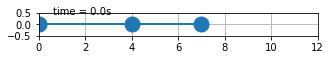

aqui


In [26]:
import numpy as np       # Importa o módulo numpy (métodos numéricos)
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation
from matplotlib.patches import Circle

# variáveis dos enunciado

## Parâmetros da suspensão
m1 = 10.             # Massa
m2 = 1.
k1 = 30.             # Coeficientes de mola
k2 = 30.
k3 = 30.
c1 = 1.              # Coeficientes de amortecimento
c2 = 1.
c3 = 1.


x10 = 1.0             # Condição inicial para x1
y10 = 0.0             # Condição inicial para y1
x20 = 1.0             # Condição inicial para x2
y20 = 0.0             # Condição inicial para y2

# Parâmetros e critérios de parada do algoritmo de integração ODE
abserr = 1.0e-8        # Erro absoluto
relerr = 1.0e-6        # Erro relativo
stoptime = 10.0        # Tempo final de integração
numpoints = 501       # Número de pontos de integração

# Cria o vetor com os valores dos tempos de integração para utiliza no plot
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]
dt = t[1]-t[0]

# Agrupando os parâmetros e condições iniciais par ao algoritmo:
p = [m1, m2, k1, k2, k3, c1, c2, c3]
w0 = [x10, y10, x20, y20]

# Chamada ao algoritmo de integração 
wsol = odeint(sistema, w0, t, args=(p,),atol=abserr, rtol=relerr)

# Separa a solução nos vetores x e y
x1 = wsol[:,0]
y1 = wsol[:,1]
x2 = wsol[:,2]
y2 = wsol[:,3]


fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0,12), ylim=(-0.5,0.5))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2, markersize=15)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

print('aqui')


def animate(i):
    Origem = [0, 0, 0]
    thism1 = [0, x1[i]+3 , x2[i]+6]
    
    line.set_data(thism1, Origem)
    #line.set_data(thism1, thism2)
        
    time_text.set_text(time_template % (i*dt))
    return  line, time_text


ani = animation.FuncAnimation(
    fig, animate, len(wsol), interval=dt*numpoints, blit=True)
plt.show()

ani.save('final2.mp4')
print('aqui')

from IPython.display import HTML
HTML(ani.to_html5_video())



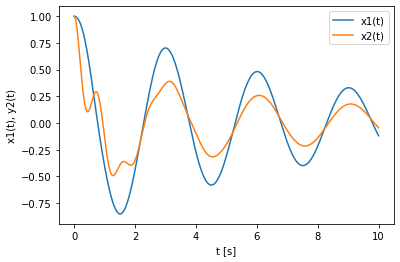

In [27]:

# Plotando o resultado
plt.figure()         # Define uma figura para plotar
                     # Figura é formada por dois subplots

plt.plot(t,x1, label="x1(t)")
plt.plot(t,x2, label="x2(t)")
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('x1(t), y2(t)')

plt.show()

## Referências

Kiusalaas, J. (2013). **Numerical Methods in Engineering With Python 3**. Cambridge: Cambridge.<br>
S. Rao. (2012) **Vibrações Mecânicas**. Prentice Hall, 4.ª ed. 